In [90]:
import pandas as pd
import nltk
import numpy as np
import re
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
# scraped_data = "/home/yue/data/UsefulScience/useful_science.csv"
# data_dir = '/home/yue/data/UsefulScience/'
#     
# file_list = ['in_edit','posted','ready_for_post','rejected']
# df_list = []
# for f in file_list:
#     df_tmp = pd.read_csv(data_dir+f+'.csv')
#     print(df_tmp.shape)
#     df_list.append(df_tmp)
# df_new = pd.concat(df_list)
# df_new.columns = ['link','reason','summary']
# df_new = df_new[['link','summary']]
# 
# df_old = pd.read_csv(scraped_data)
# df_old = df_old[['link','summary']]
# df_old =df_old.drop_duplicates()
# 
# df_all_l = [df_new,df_old]
# df_all = pd.concat(df_all_l)
# df_all.to_csv(data_dir+'all_data.csv')

In [96]:
data_path = '/home/yue/data/UsefulScience/all_data.csv'
df = pd.read_csv(data_path)
summaries = df[['summary']].values
summaries = [s[0] for s in summaries]
text = " ".join(summaries)

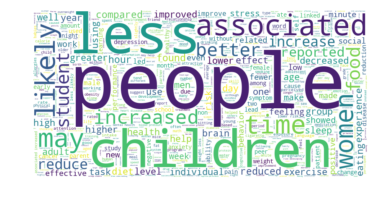

<Figure size 432x288 with 0 Axes>

In [97]:
# draw the word cloud of the text, display the frequency of words in the summaries
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# # http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
# alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

wc = WordCloud(width=800, height=400,background_color="white", max_words=2000, 
               stopwords=STOPWORDS, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# # store to file
# wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
# plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.axis("off")
plt.show()

In [27]:
# sentence level statistics 

from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters
punkt_param = PunktParameters()
punkt_param.abbrev_types = set(['dr', 'vs', 'mr', 'mrs', 'prof', 'inc','e.g','a.m','p.m'])
sentence_splitter = PunktSentenceTokenizer(punkt_param)
## print text statistics 
# average number of sentences
summ_sents = [sentence_splitter.tokenize(re.sub(r"\(.*\)", "", s)) for s in summaries]
# summ_sents = [s.split('.') for s in summaries]
sent_len = [len(s) for s in summ_sents]

# sent_tup = [(s,len(s)) for s in summ_sents]
# max(sent_tup, key=lambda x:x[1])
print("number of total summaries:",len(sent_len))
print('number_of_sentences in summaries mean: %f, max: %d, min: %d'%(np.mean(sent_len), np.max(sent_len),np.min(sent_len)))

number of total summaries: 1062
number_of_sentences in summaries mean: 1.141243, max: 3, min: 1


In [12]:
# average number of words
from nltk import word_tokenize

# summaries=[s.lower() for s in summaries] ###lower summary cases
summ_words= [word_tokenize(s) for s in summaries]
word_tup = [(s,len(s)) for s in summ_words]
word_len = [len(s) for s in summ_words]
# min(word_tup, key=lambda x:x[1])
# max(word_tup, key=lambda x:x[1])
print('number_of_words in summaries mean: %f, max: %d, min: %d'%(np.mean(word_len), np.max(word_len),np.min(word_len)))

number_of_words in summaries mean: 26.977401, max: 65, min: 6


In [13]:
# most frequence noun
summ_tag=  [nltk.pos_tag(s) for s in summ_words]
def flatten_list(list_of_list):
    return [w for l in list_of_list for w in l]
# print(summ_tag)
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())
tagdict = findtags('NN', flatten_list(summ_tag))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('risk', 98), ('health', 58), ('time', 52), ('food', 46), ('%', 44)]
NNP [('Children', 14), ('Young', 10), ('IQ', 9), ('Facebook', 8), ('BMI', 7)]
NNPS [('States', 3), ('Calories', 1)]
NNS [('people', 140), ('People', 111), ('children', 86), ('women', 70), ('levels', 55)]


In [158]:
# most frequent verb
tagdict_v = findtags('V', flatten_list(summ_tag))
for tag in sorted(tagdict_v):
    print(tag, tagdict_v[tag])


VB [('be', 92), ('help', 38), ('reduce', 38), ('make', 23), ('have', 22)]
VBD [('were', 202), ('was', 119), ('had', 109), ('did', 49), ('reported', 47)]
VBG [('using', 28), ('having', 24), ('eating', 23), ('being', 23), ('Eating', 15)]
VBN [('associated', 125), ('compared', 45), ('increased', 34), ('found', 33), ('reduced', 25)]
VBP [('are', 149), ('have', 52), ('ate', 15), ('do', 13), ('tend', 13)]
VBZ [('is', 147), ('has', 27), ('suggests', 13), ('reduces', 11), ('faces', 11)]


[((',', 'and'), 136),
 (('associated', 'with'), 125),
 (('likely', 'to'), 99),
 (('more', 'likely'), 77),
 (('in', 'the'), 76),
 (('risk', 'of'), 65),
 (('those', 'who'), 58),
 (('were', 'more'), 49),
 (('such', 'as'), 48),
 (('People', 'who'), 47),
 ((')', '.'), 46),
 (('was', 'associated'), 45),
 (('to', 'be'), 44),
 (('compared', 'to'), 43),
 (('than', 'those'), 42),
 (('.', 'This'), 42),
 ((',', 'but'), 41),
 (('in', 'a'), 40),
 (('with', 'a'), 40),
 (('are', 'more'), 38)]

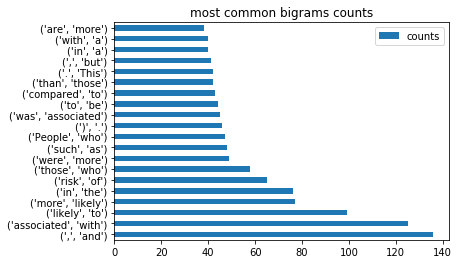

In [98]:
# most common bigrams
from nltk.util import bigrams,trigrams
bi_corpus = [bigrams(s) for s in summ_words]
bi_list = flatten_list([list(l) for l in bi_corpus]) 
d_bi = Counter(bi_list).most_common(20)
df= pd.DataFrame(d_bi,columns=['grams','counts'])
ax= df.plot(kind='barh')
ax.set_yticklabels(df.grams)
ax.set_title("most common bigrams counts")
Counter(bi_list).most_common(20)

[(('more', 'likely', 'to'), 75),
 (('was', 'associated', 'with'), 45),
 (('is', 'associated', 'with'), 37),
 (('than', 'those', 'who'), 34),
 (('were', 'more', 'likely'), 31),
 (('are', 'more', 'likely'), 26),
 (('(', 'such', 'as'), 23),
 (('(', 'e.g', '.'), 22),
 (('less', 'likely', 'to'), 18),
 ((',', 'such', 'as'), 17),
 ((',', 'compared', 'to'), 14),
 (('associated', 'with', 'increased'), 14),
 (('(', 'i.e', '.'), 14),
 (('associated', 'with', 'a'), 13),
 (('likely', 'to', 'be'), 13),
 (('associated', 'with', 'greater'), 12),
 (('those', 'who', 'did'), 12),
 (('the', 'risk', 'of'), 12),
 (('risk', 'of', 'developing'), 12),
 (('higher', 'levels', 'of'), 11)]

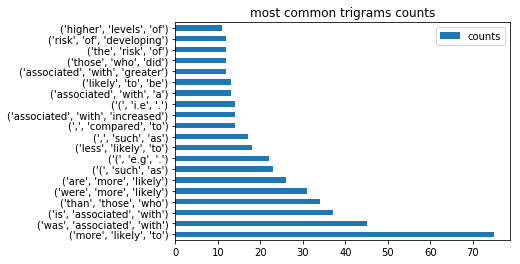

In [87]:
# most common trigrams
# most common bigrams
from nltk.util import trigrams
tri_corpus = [trigrams(s) for s in summ_words]
tri_list = flatten_list([list(l) for l in tri_corpus]) 
d = Counter(tri_list).most_common(20)
df= pd.DataFrame(d,columns=['grams','counts'])
ax= df.plot(kind='barh')
ax.set_yticklabels(df.grams)
ax.set_title("most common trigrams counts")
# df.counts
Counter(tri_list).most_common(20)

In [ ]:
#most common LCS

In [ ]:
#  sementic role labeling
